In [1]:
import numpy as np
from SiPANN import cross_coup
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact
from ipywidgets import widgets

## Compare our results to the papers
First lets compare some of our coefficients to theirs:

In [8]:
#theirs for a 450x220 waveguide at 1550nm wavelength
ae_theirs = 0.177967
ao_theirs = 0.049910
ge_theirs = 0.011898
go_theirs = 0.006601

#ours for the same size
inputs = np.array([[1550, 450, 220]])
coeffs = cross_coup.DC_coeffs.predict(inputs)
ae_ours = coeffs[0,0]
ao_ours = coeffs[0,1]
ge_ours = coeffs[0,2]
go_ours = coeffs[0,3]

print("ae, theirs: {}\tours: {}\tdifference: {}".format(ae_theirs,ae_ours,np.abs(ae_theirs-ae_ours)))
print("ao, theirs: {}\tours: {}\tdifference: {}".format(ao_theirs,ao_ours,np.abs(ao_theirs-ao_ours)))
print("ge, theirs: {}\tours: {}\tdifference: {}".format(ge_theirs,ge_ours,np.abs(ge_theirs-ge_ours)))
print("go, theirs: {}\tours: {}\tdifference: {}".format(go_theirs,go_ours,np.abs(go_theirs-go_ours))) 

ae, theirs: 0.177967	ours: 0.14230286221936694	difference: 0.03566413778063304
ao, theirs: 0.04991	ours: 0.05902053967975007	difference: 0.00911053967975007
ge, theirs: 0.011898	ours: 0.009947852689947467	difference: 0.0019501473100525333
go, theirs: 0.006601	ours: 0.007268492051252906	difference: 0.000667492051252906


### And a plot to compare as well

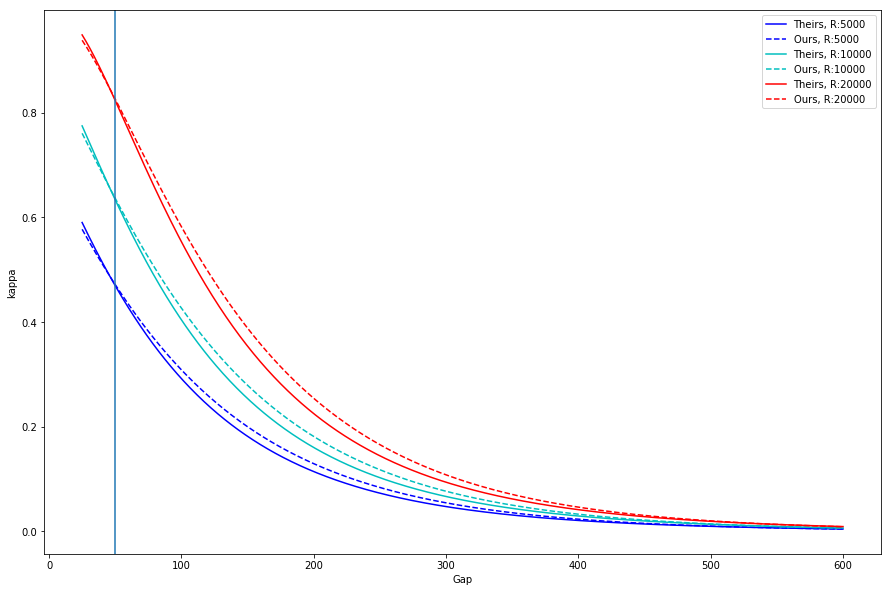

In [9]:
wave = 1550
w = 450
t = 220
dom = np.linspace(25,600,1000)
r = [5000,10000,20000]
colors = ['b','c','r']

plt.figure(figsize=(15,10))
for i in range(3):
    plt.plot(dom, cross_coup.rr_450_220(wave, w, t, r[i], dom),colors[i],label="Theirs, R:"+str(r[i]))
    plt.plot(dom, np.abs(cross_coup.rr(wave, w, t, r[i], dom)),colors[i]+'--',label="Ours, R:"+str(r[i]))
    
plt.legend(loc='upper right')
plt.axvline(50)
plt.xlabel('Gap')
plt.ylabel('kappa')
    
plt.show()

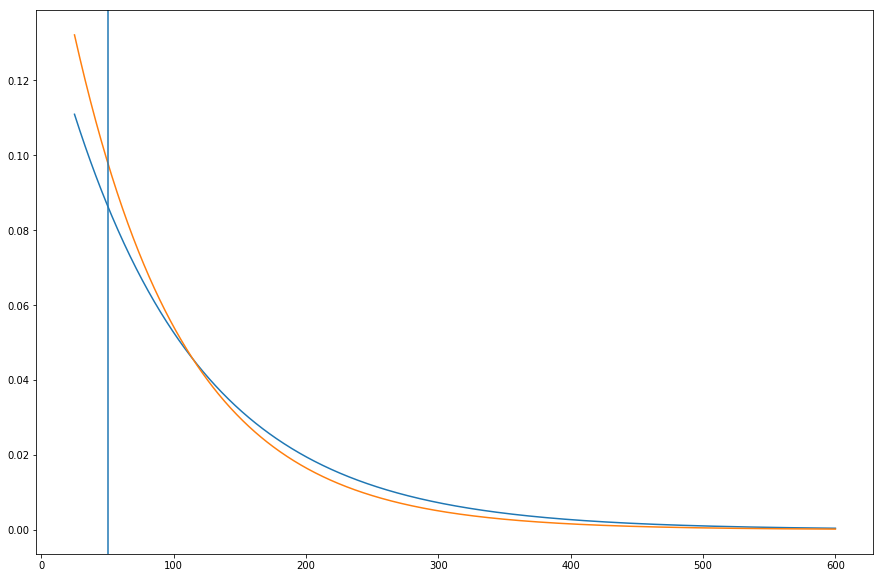

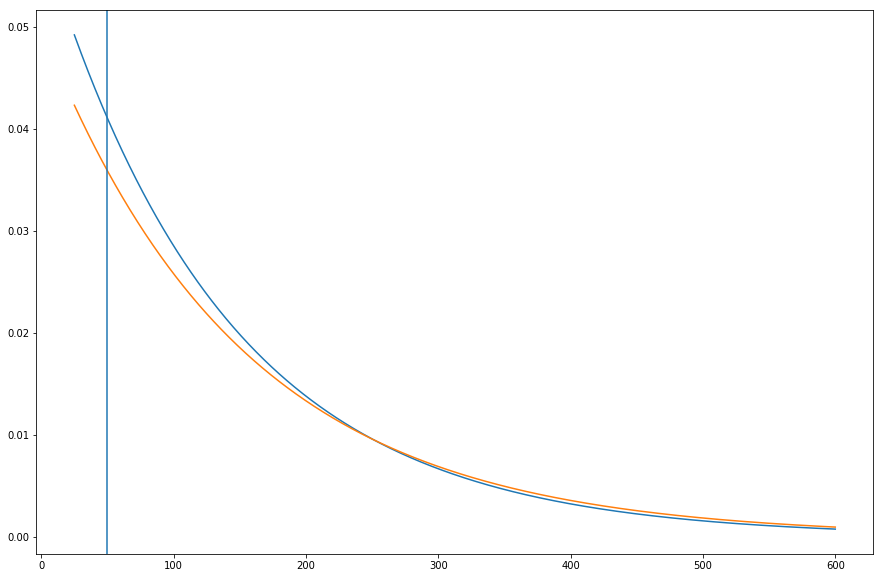

In [10]:
plt.figure(figsize=(15,10))
plt.plot(dom, ae_ours*np.exp(-ge_ours*dom))
plt.plot(dom, ae_theirs*np.exp(-ge_theirs*dom))
plt.axvline(50)
plt.show()
plt.figure(figsize=(15,10))
plt.plot(dom, ao_ours*np.exp(-go_ours*dom))
plt.plot(dom, ao_theirs*np.exp(-go_theirs*dom))
plt.axvline(50)
plt.show()

### Check the relative errors for each plot

In [11]:
theirs = []
ours = []
for i in range(3):
    theirs.append(cross_coup.rr_450_220(wave, w, t, r[i], dom))
    ours.append(np.abs(cross_coup.rr(wave, w, t, r[i], dom)))
for i in range(3):  
    print("For radius {} \t re: {}".format(r[i], np.mean(np.abs((theirs[i] - ours[i])/theirs[i]))))

For radius 5000 	 re: 0.08802850019379237
For radius 10000 	 re: 0.08733488881394876
For radius 20000 	 re: 0.08623900485195586


### And an interactive plot to play around with it

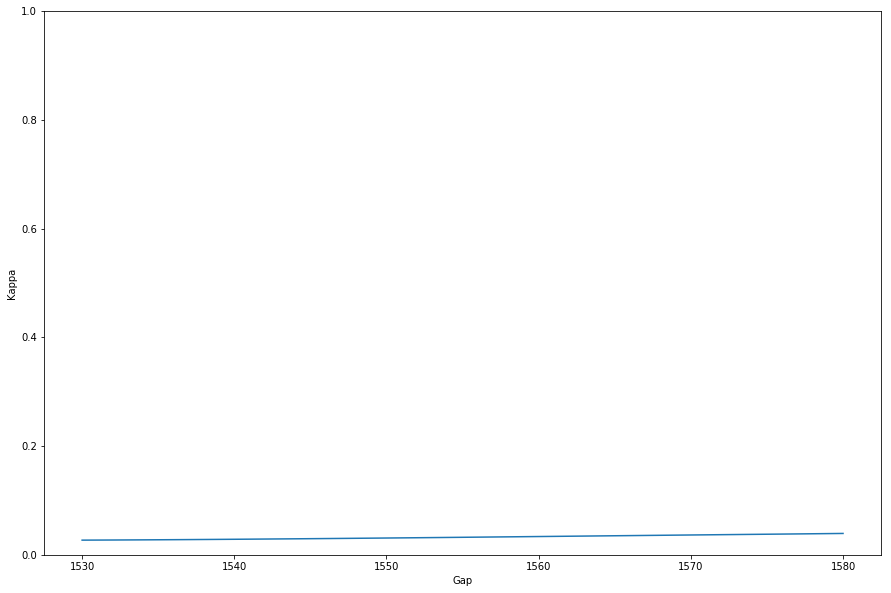

<function __main__.f(gap, width, thickness, radius)>

In [12]:
dom = np.linspace(50,500)
wave = np.linspace(1530,1580)
def f(gap, width, thickness, radius):
    plt.figure(figsize=(15,10))
    plt.ylim((0,1))
    plt.xlabel('Gap')
    plt.ylabel('Kappa')
    plt.plot(wave, np.abs(cross_coup.rr(wave, width, thickness, radius, gap)))
    plt.show()
interact(f, gap=widgets.FloatSlider(min=50,max=1000,value=500), 
             width=widgets.FloatSlider(min=400,max=600,value=400), 
             thickness=widgets.FloatSlider(min=210,max=230,value=220), 
             radius=widgets.FloatSlider(min=5000,max=20000,value=10000))

### Comparing the closed form solutions to the quadrature one

<Figure size 432x288 with 0 Axes>

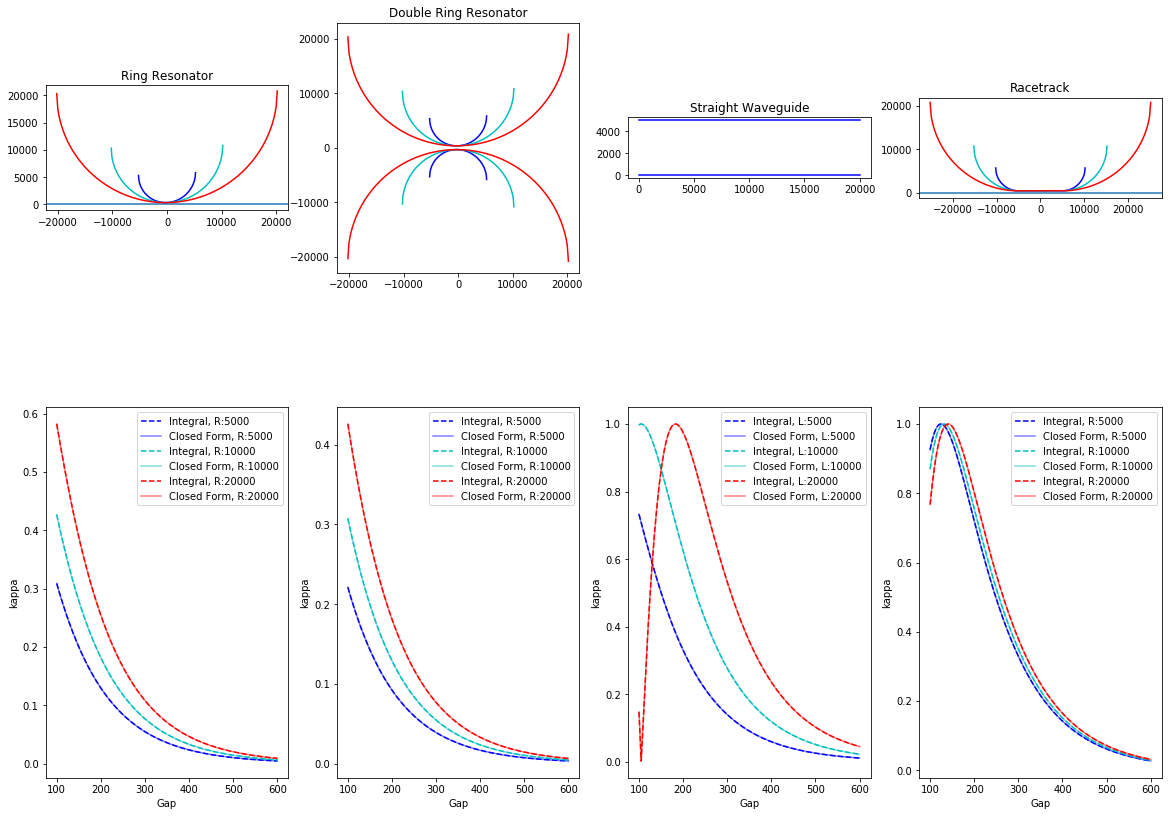

In [2]:
n=200
wave = 1550
w = 450
t = 220
gap = np.linspace(100,600,n)
colors = ['b','c','r']

#RING RESONATOR
r = [5000,10000,20000]

plt.tight_layout()
plt.figure(figsize=(20,15))
plt.subplot(2,4,1)
plt.title("Ring Resonator")
ax = plt.gca()
ax.set_aspect(1)
plt.axhline(0)
for i in range(3):
    zmin = -(r[i]+w/2)
    zmax = (r[i]+w/2)
    z = np.linspace(zmin, zmax, n)
    g = lambda z: gap + r[i] + w/2 - np.sqrt((r[i] + w/2)**2 - z**2)
    plt.plot(z, g(z),colors[i])
    
plt.subplot(2,4,5)
for i in range(3):
    g = lambda z: gap + r[i] + w/2 - np.sqrt((r[i] + w/2)**2 - z**2)
    zmin = -(r[i]+w/2)
    zmax = (r[i]+w/2)
    plt.plot(gap, np.abs(cross_coup.any_gap(wave, w, t, g, zmin, zmax)),colors[i]+'--',label="Integral, R:"+str(r[i]))
    plt.plot(gap, np.abs(cross_coup.rr(wave, w, t, r[i], gap)),colors[i],alpha=0.5,label="Closed Form, R:"+str(r[i]))
    
plt.legend(loc='upper right')
plt.xlabel('Gap')
plt.ylabel('kappa')

#DOUBLE RING
r = [5000,10000,20000]

plt.subplot(2,4,2)
plt.title("Double Ring Resonator")
ax = plt.gca()
ax.set_aspect(1)
for i in range(3):
    zmin = -(r[i]+w/2)
    zmax = (r[i]+w/2)
    z = np.linspace(zmin, zmax, n)
    g = lambda z: (gap + r[i] + w/2 - np.sqrt((r[i] + w/2)**2 - z**2))
    h = lambda z: -(gap + r[i] + w/2 - np.sqrt((r[i] + w/2)**2 - z**2))
    plt.plot(z, g(z),colors[i])
    plt.plot(z, h(z),colors[i])
    
plt.subplot(2,4,6)
for i in range(3):
    g = lambda z: 2*(gap/2 + r[i] + w/2 - np.sqrt((r[i] + w/2)**2 - z**2))
    zmin = -(r[i]+w/2)
    zmax = (r[i]+w/2)
    plt.plot(gap, np.abs(cross_coup.any_gap(wave, w, t, g, zmin, zmax)),colors[i]+'--',label="Integral, R:"+str(r[i]))
    plt.plot(gap, np.abs(cross_coup.double_rr(wave, w, t, r[i], gap)),colors[i],alpha=0.5,label="Closed Form, R:"+str(r[i]))
  
plt.legend(loc='upper right')
plt.xlabel('Gap')
plt.ylabel('kappa') 

#STRAIGHT WAVEGUIDE
l = [5000,10000,20000]

plt.subplot(2,4,3)
plt.title('Straight Waveguide')
ax = plt.gca()
ax.set_aspect(1)
x = np.linspace(0,20000,100)
y = np.zeros(100)
plt.plot(x, y, colors[0])
plt.plot(x, y+5000, colors[0])


plt.subplot(2,4,7)
for i in range(3):
    g = lambda z: gap
    zmin = 0
    zmax = l[i]
    plt.plot(gap, np.abs(cross_coup.any_gap(wave, w, t, g, zmin, zmax)),colors[i]+'--',label="Integral, L:"+str(r[i]))
    plt.plot(gap, np.abs(cross_coup.straight(wave, w, t, l[i], gap)),colors[i],alpha=0.5,label="Closed Form, L:"+str(r[i]))
    
plt.legend(loc='upper right')
plt.xlabel('Gap')
plt.ylabel('kappa')

#RACETRACK
r = [5000,10000,20000]
l = 10000

plt.subplot(2,4,4)
plt.title("Racetrack")
ax = plt.gca()
ax.set_aspect(1)
plt.axhline(0)
for i in range(3):
    zmin = -(r[i]+w/2)-l/2
    zmax = (r[i]+w/2)+l/2
    z = np.linspace(zmin, zmax, n)
    def g(z):
        if np.abs(z) < l/2:
            return 500
        else:
            return 500 + r[i] + w/2 - np.sqrt((r[i] + w/2)**2 - (np.abs(z)-l/2)**2)
    g = np.vectorize(g)
    plt.plot(z, g(z), colors[i])
    
plt.subplot(2,4,8)
for i in range(3):
    def g(z):
        if np.abs(z) < l/2:
            return gap
        else:
            return gap + r[i] + w/2 - np.sqrt((r[i] + w/2)**2 - (np.abs(z)-l/2)**2)
    g = np.vectorize(g)
    zmin = -(r[i]+w/2)-l/2
    zmax = (r[i]+w/2)+l/2
    plt.plot(gap, np.abs(cross_coup.any_gap(wave, w, t, g, zmin, zmax)),colors[i]+'--',label="Integral, R:"+str(r[i]))
    plt.plot(gap, np.abs(cross_coup.racetrack(wave, w, t, r[i], gap, l)),colors[i],alpha=0.5,label="Closed Form, R:"+str(r[i]))
    
plt.legend(loc='upper right')
plt.xlabel('Gap')
plt.ylabel('kappa')
plt.savefig('TestFunctions.png')
plt.show()